##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import sklearn.metrics
from sklearn import model_selection as ms
from sklearn import linear_model as lm

In [2]:
scores = pd.read_csv("SCORES.csv")
scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


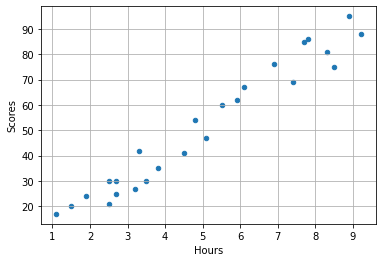

In [5]:
scores.plot.scatter(0, 1)
plt.grid()
plt.show()

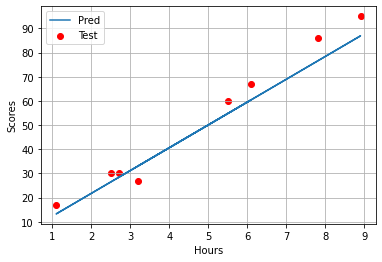

Coefficient: [9.43970373]
Intercept: [2.88387785]
Wartości oznaczają współczynniki linii regresji: y = 9.44*x + 2.88
Średni błąd bezwzględny:5.536
Błąd średniokwadratowy:36.43
Pierwiastek błędu średniokwadratowego:6.035


In [6]:
X_train, X_test, y_train, y_test = ms.train_test_split(scores['Hours'].values.reshape(-1, 1), scores['Scores'].values.reshape(-1, 1), test_size = 0.3)
regr = lm.LinearRegression()
reg = regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, c='red')
plt.plot(X_test, y_pred)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.legend(["Pred", "Test"])
plt.grid()
plt.show()

print(f'Coefficient: {reg.coef_[0]}')
print(f'Intercept: {reg.intercept_}')
print(f'Wartości oznaczają współczynniki linii regresji: y = {reg.coef_[0][0]:.4}*x + {reg.intercept_[0]:.3}')
print(f'Średni błąd bezwzględny:{sklearn.metrics.mean_absolute_error(y_test, y_pred):.4}')
print(f'Błąd średniokwadratowy:{sklearn.metrics.mean_squared_error(y_test, y_pred):.4}')
print(f'Pierwiastek błędu średniokwadratowego:{np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)):.4}')

In [7]:
sbp = pd.read_csv("SBP.csv")
sbp.head()

,Age,SBP
0,60,117
1,61,120
2,74,145
3,57,129
4,63,132


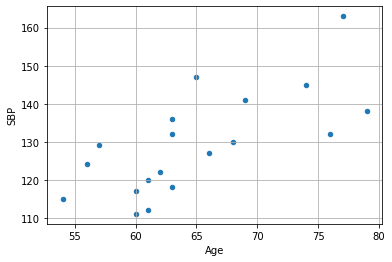

In [8]:
sbp.plot.scatter(0, 1)
plt.grid()
plt.show()

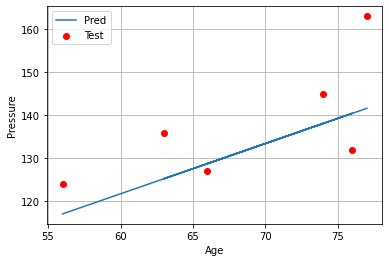

Coefficient: [1.16815772]
Intercept: [51.6749503]
Wartości oznaczają współczynniki linii regresji: y = 1.168*x + 51.7
Średni błąd bezwzględny:9.354
Błąd średniokwadratowy:123.6
Pierwiastek błędu średniokwadratowego:11.12


In [9]:
X_train, X_test, y_train, y_test = ms.train_test_split(sbp['Age'].values.reshape(-1, 1), sbp['SBP'].values.reshape(-1, 1), test_size = 0.3)
regr = lm.LinearRegression()
reg = regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, c='red')
plt.plot(X_test, y_pred)
plt.xlabel("Age")
plt.ylabel("Pressure")
plt.legend(["Pred", "Test"])
plt.grid()
plt.show()

print(f'Coefficient: {reg.coef_[0]}')
print(f'Intercept: {reg.intercept_}')
print(f'Wartości oznaczają współczynniki linii regresji: y = {reg.coef_[0][0]:.4}*x + {reg.intercept_[0]:.3}')
print(f'Średni błąd bezwzględny:{sklearn.metrics.mean_absolute_error(y_test, y_pred):.4}')
print(f'Błąd średniokwadratowy:{sklearn.metrics.mean_squared_error(y_test, y_pred):.4}')
print(f'Pierwiastek błędu średniokwadratowego:{np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)):.4}')

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [10]:
petrol = pd.read_csv('PETROL.csv')
petrol.head()

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


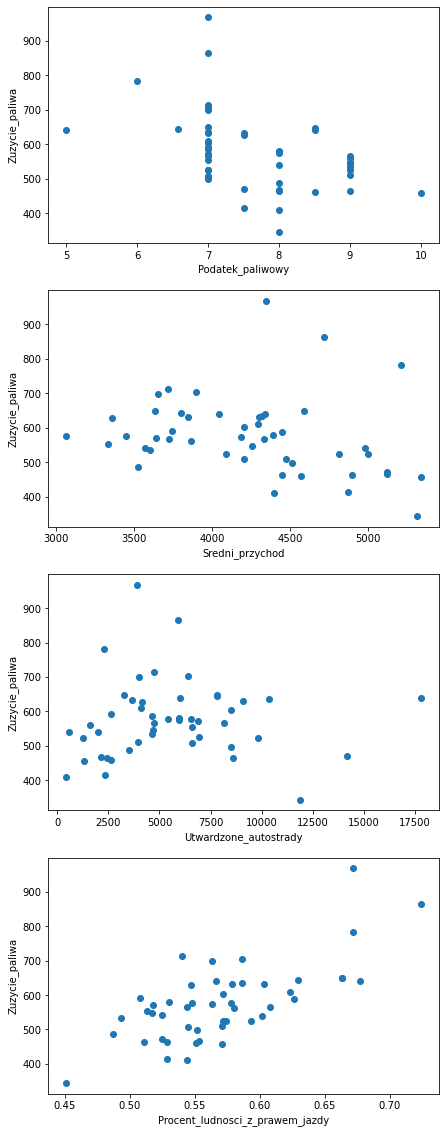

In [11]:
names = petrol.columns
fig, ax = plt.subplots(4, figsize=(7, 20))
for i in range(4):
    ax[i].scatter(petrol[petrol.columns[i]], petrol[petrol.columns[4]])
    ax[i].set_xlabel(petrol.columns[i])
    ax[i].set_ylabel(petrol.columns[4])

In [12]:
train_petrol, test_petrol = ms.train_test_split(petrol, test_size = 0.3)
x_train = train_petrol.drop('Zuzycie_paliwa', axis=1)
y_train = train_petrol['Zuzycie_paliwa'].values.reshape(-1, 1)
x_test = test_petrol.drop('Zuzycie_paliwa', axis=1)
y_test = test_petrol['Zuzycie_paliwa'].values.reshape(-1, 1)
reg = lm.LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [13]:
print(f'Coefficient: {reg.coef_[0]}')
print(f'Intercept: {reg.intercept_}')
print(f'Wartości oznaczają współczynniki linii regresji: y = {reg.coef_[0][0]:.4} * podatek  + {reg.coef_[0][1]:.4} * przychod  + {reg.coef_[0][2]:.4} * autostrady  + {reg.coef_[0][3]} * ludnosc  +  {reg.intercept_[0]:.3}')
print(f'Średni błąd bezwzględny:{sklearn.metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Błąd średniokwadratowy:{sklearn.metrics.mean_squared_error(y_test, y_pred)}')
print(f'Pierwiastek błędu średniokwadratowego:{np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))}')

Coefficient: [-4.83183973e+01 -4.08671285e-02 -7.67081029e-03  1.17884474e+03]
Intercept: [509.29819984]
Wartości oznaczają współczynniki linii regresji: y = -48.32 * podatek  + -0.04087 * przychod  + -0.007671 * autostrady  + 1178.8447444698047 * ludnosc  +  5.09e+02
Średni błąd bezwzględny:66.12276947273105
Błąd średniokwadratowy:6403.871388084368
Pierwiastek błędu średniokwadratowego:80.0241925175404


### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [14]:
heart = pd.read_csv("HEART.csv")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


In [15]:
heart['slope'].value_counts()

?    190
2     91
1     12
3      1
Name: slope, dtype: int64

In [16]:
heart['ca'].value_counts()

?    291
0      3
Name: ca, dtype: int64

In [17]:
heart['thal'].value_counts()

?    266
7     11
6     10
3      7
Name: thal, dtype: int64

In [18]:
heart = heart.drop(['slope', 'ca', 'thal'], axis=1)
heart = heart.where(heart != '?')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,NaN,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,1
290,54,0,3,130,294,0,1,100,1,0.0,1
291,56,1,4,155,342,1,0,150,1,3.0,1
292,58,0,2,180,393,0,0,110,1,1.0,1


In [19]:
dummy_cp = pd.get_dummies(heart['cp'], 'cp')
dummy_restecg = pd.get_dummies(heart['restecg'], 'restecg')
heart = heart.drop('cp', axis=1)
heart = heart.drop('restecg', axis=1)
heart = pd.concat([heart, dummy_cp], axis=1, join="inner")
heart = pd.concat([heart, dummy_restecg], axis=1, join="inner")
heart

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_1,cp_2,cp_3,cp_4,restecg_0,restecg_1,restecg_2
0,28,1,130,132,0,185,0,0.0,0,0,1,0,0,0,0,1
1,29,1,120,243,0,160,0,0.0,0,0,1,0,0,1,0,0
2,29,1,140,NaN,0,170,0,0.0,0,0,1,0,0,1,0,0
3,30,0,170,237,0,170,0,0.0,0,1,0,0,0,0,1,0
4,31,0,100,219,0,150,0,0.0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,160,331,0,94,1,2.5,1,0,0,0,1,1,0,0
290,54,0,130,294,0,100,1,0.0,1,0,0,1,0,0,1,0
291,56,1,155,342,1,150,1,3.0,1,0,0,0,1,1,0,0
292,58,0,180,393,0,110,1,1.0,1,0,1,0,0,1,0,0


In [20]:
heart = heart.dropna(axis=0)
heart = heart.astype('float')
heart = heart.rename(columns={'num       ' : 'num'})
heart

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_1,cp_2,cp_3,cp_4,restecg_0,restecg_1,restecg_2
0,28.0,1.0,130.0,132.0,0.0,185.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,29.0,1.0,120.0,243.0,0.0,160.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,30.0,0.0,170.0,237.0,0.0,170.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,31.0,0.0,100.0,219.0,0.0,150.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,32.0,0.0,105.0,198.0,0.0,165.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52.0,1.0,160.0,331.0,0.0,94.0,1.0,2.5,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
290,54.0,0.0,130.0,294.0,0.0,100.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
291,56.0,1.0,155.0,342.0,1.0,150.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
292,58.0,0.0,180.0,393.0,0.0,110.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [21]:
train, test = ms.train_test_split(heart, test_size = 0.2)


In [22]:
x_train = train.drop('num', axis=1)
y_train = train['num'].values
x_test = test.drop('num', axis=1)
y_test = test['num'].values
reg = lm.LogisticRegression(solver='newton-cg').fit(x_train, y_train)
y_pred = reg.predict(x_test)


In [23]:
print(f'Coefficient: {reg.coef_[0]}')
print(f'Intercept: {reg.intercept_}')
print(f'Wartości oznaczają współczynniki linii regresji: \n num =')
for i, x in enumerate(x_test.columns):
    print(f'{reg.coef_[0][i]:.4} * x({x})  + \t\t\t\t')
print(f'{reg.intercept_[0]:.3}')
print(f'Średni błąd bezwzględny:{sklearn.metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Błąd średniokwadratowy:{sklearn.metrics.mean_squared_error(y_test, y_pred)}')
print(f'Pierwiastek błędu średniokwadratowego:{np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))}')

Coefficient: [-1.02652865e-02  1.24055625e+00  1.09309481e-03  6.02866746e-03
  1.34435319e+00 -8.22915823e-03  5.50393102e-01  1.20042419e+00
  2.70486877e-01 -1.06015013e+00 -2.11274577e-01  1.00092117e+00
 -1.86573012e-01 -3.38169123e-01 -1.54340701e-01]
Intercept: [-2.50840425]
Wartości oznaczają współczynniki linii regresji: 
 num =
-0.01027 * x(age)  + 				
1.241 * x(sex)  + 				
0.001093 * x(trestbps)  + 				
0.006029 * x(chol)  + 				
1.344 * x(fbs)  + 				
-0.008229 * x(thalach)  + 				
0.5504 * x(exang)  + 				
1.2 * x(oldpeak)  + 				
0.2705 * x(cp_1)  + 				
-1.06 * x(cp_2)  + 				
-0.2113 * x(cp_3)  + 				
1.001 * x(cp_4)  + 				
-0.1866 * x(restecg_0)  + 				
-0.3382 * x(restecg_1)  + 				
-0.1543 * x(restecg_2)  + 				
-2.51
Średni błąd bezwzględny:0.20754716981132076
Błąd średniokwadratowy:0.20754716981132076
Pierwiastek błędu średniokwadratowego:0.45557345160942025
